# Import libraries

In [112]:
import requests as re
from bs4 import BeautifulSoup
import time

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import category_encoders as ce

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Import dataset

In [2]:
flags = pd.read_csv("flag.csv", names=['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 
                                'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 
                                'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 
                                'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright'])
flags

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


# Data splitting
Let's challenge and try to make a classification based on descriptions and characteristics of flags only, without considering geographical information, area and population

In [3]:
X = flags.iloc[:,7:]
y = flags.iloc[:,6]

Divide all features into numerical and categorical features according to their description

In [4]:
cat = ['red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 
       'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']
num = ['bars', 'stripes', 'colours','circles', 'crosses', 'saltires', 'quarters', 'sunstars']
X[num].describe()

,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.453608,1.551546,3.463918,0.170103,0.149485,0.092784,0.149485,1.386598
std,1.038339,2.328005,1.300154,0.463075,0.385387,0.290879,0.435860,4.396186
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,14.000000,8.000000,4.000000,2.000000,1.000000,4.000000,50.000000


There are no obvious outliers or omissions

In [6]:
y.value_counts()

1    60
0    40
2    36
5    27
6    15
3     8
4     4
7     4
Name: religion, dtype: int64

Our target classes are not balanced, so we use stratification splitting

# Baseline - Logistic Regression
Our baseline will be Logistic Regression based on raw data and we just encode category features usind one-hot-encoder

In [135]:
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(X, columns=['mainhue', 'topleft', 'botright'], 
                                                                   drop_first=True), 
                                                    y, test_size=0.2, stratify=y, random_state=42)
lr = LogisticRegression()
sc = StandardScaler()
sc.fit_transform(X_train)
lr.fit(X_train, y_train)
print(f"""{lr} accuracy: {round(lr.score(X_test, y_test), 3)}
{classification_report(y_test, lr.predict(sc.transform(X_test)))}""")

LogisticRegression() accuracy: 0.41
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       1.00      0.33      0.50        12
           2       0.42      0.71      0.53         7
           3       0.14      0.50      0.22         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.25      0.33      0.29         3
           7       0.00      0.00      0.00         1

    accuracy                           0.33        39
   macro avg       0.29      0.27      0.23        39
weighted avg       0.51      0.33      0.35        39



We get a bad implementation, but of course we can get better score)

# Analysis of numeric features 
Let's look at the distributions of numerical features and try to transform them to make them more model-friendly

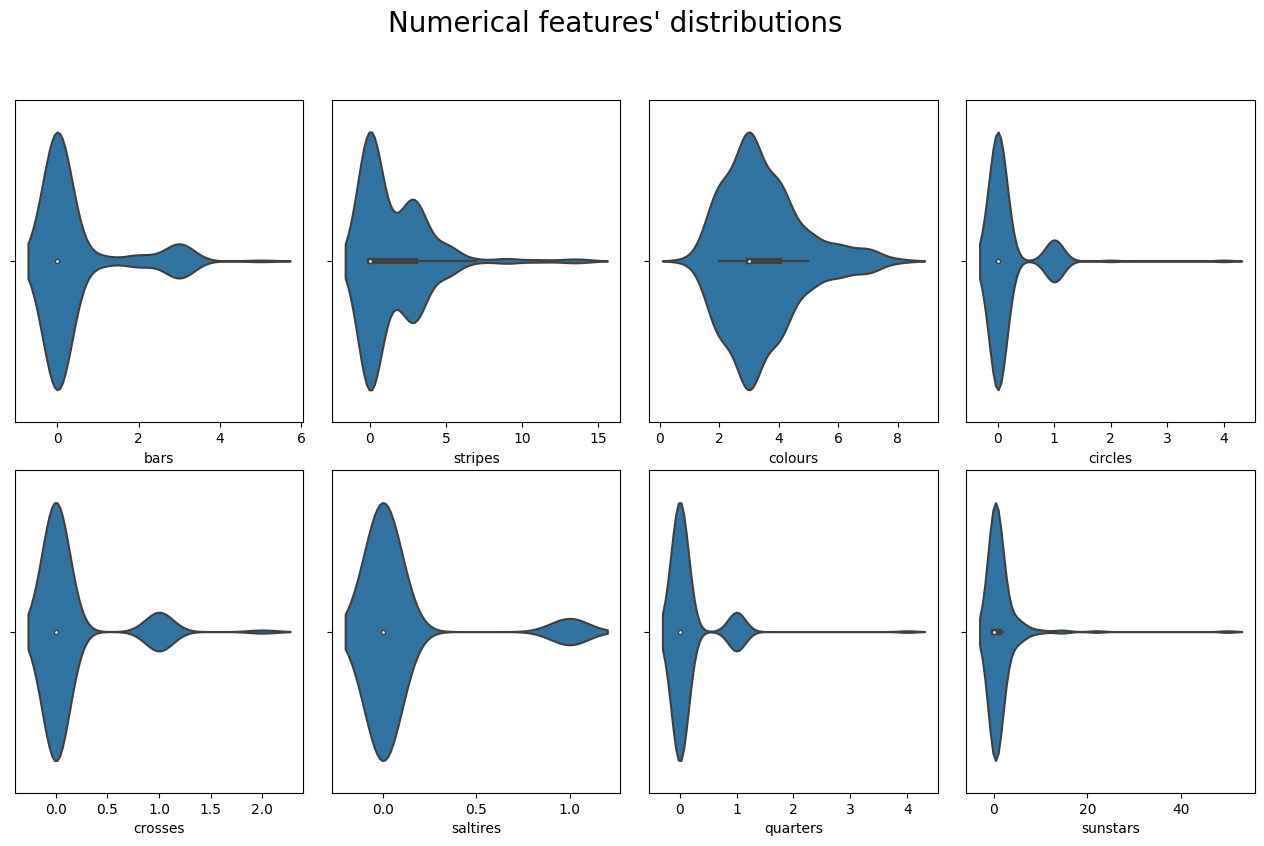

In [99]:
fig, axs = plt.subplots(2,4, figsize=(16,9))
plt.suptitle("Numerical features' distributions", size=20)
plt.subplots_adjust(wspace=0.1, hspace=0.15)
sns.violinplot(X.bars, ax=axs[0,0])
sns.violinplot(X.stripes, ax=axs[0,1])
sns.violinplot(X.colours, ax=axs[0,2])
sns.violinplot(X.circles, ax=axs[0,3])
sns.violinplot(X.crosses, ax=axs[1,0])
sns.violinplot(X.saltires, ax=axs[1,1])
sns.violinplot(X.quarters, ax=axs[1,2])
sns.violinplot(X.sunstars, ax=axs[1,3])
plt.show()

As you can see, all of our attributes have a number and in most attributes the overwhelming number of values is 0 and 1. Given the prevailing number of categorical features, let's try another type of model, let it be an ensemble - RandomForestClassifier.

# RandomForestClassifier

In [136]:
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(X, columns=['mainhue', 'topleft', 'botright'], 
                                                                   drop_first=True), 
                                                    y, test_size=0.2, stratify=y, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(f"""{rf} accuracy: {round(rf.score(X_test, y_test), 3)}
{classification_report(y_test, rf.predict(X_test))}""")

RandomForestClassifier() accuracy: 0.538
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         8
           1       0.62      0.67      0.64        12
           2       0.67      0.29      0.40         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.38      0.60      0.46         5
           6       0.67      0.67      0.67         3
           7       0.00      0.00      0.00         1

    accuracy                           0.54        39
   macro avg       0.35      0.37      0.35        39
weighted avg       0.51      0.54      0.50        39



Already better, the quality metrics have picked up a bit. Let's try to work on the features.

# Feature Engineering
Look at the correlation matrix and determine which attributes are likely to be highly mutually correlated and negatively affect the model.

In [124]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
bars,1.000000,-0.273371,-0.064574,-0.017093,0.116905,-0.128510,0.037118,-0.198697,-0.029076,0.046841,-0.096650,-0.144432,-0.140070,-0.150604,-0.114667,0.021743,-0.132973,-0.002598,0.016260,0.067709
stripes,-0.273371,1.000000,0.038278,0.014210,-0.085367,0.126104,-0.031987,0.125907,0.091814,-0.106477,-0.087479,-0.190550,-0.190735,0.091941,0.215486,-0.010242,-0.005719,-0.107426,-0.157922,-0.111564
colours,-0.064574,0.038278,1.000000,0.311759,0.428388,0.294779,0.500073,0.214334,0.375794,0.477655,0.178062,0.253827,0.378810,0.187861,0.031008,-0.173644,0.143252,0.505614,0.544576,0.398483
red,-0.017093,0.014210,0.311759,1.000000,0.031169,-0.204010,0.081769,-0.033483,0.142230,-0.055783,0.108639,0.102772,0.122031,0.119914,0.019726,-0.091458,0.025760,0.097513,0.133648,0.017507
green,0.116905,-0.085367,0.428388,0.031169,1.000000,-0.298328,0.192788,-0.131282,0.107461,0.236617,0.011643,-0.043077,0.126624,-0.085607,-0.068738,-0.007137,0.039840,0.190550,0.250157,0.243872
blue,-0.128510,0.126104,0.294779,-0.204010,-0.298328,1.000000,0.032272,0.298577,-0.245276,0.082690,0.048217,0.273647,0.242192,0.289396,0.156916,-0.116522,0.006603,0.118539,0.028249,0.106271
gold,0.037118,-0.031987,0.500073,0.081769,0.192788,0.032272,1.000000,-0.442460,0.247378,0.085019,0.011643,0.010665,0.126624,0.009430,-0.019270,-0.096461,0.159207,0.380732,0.353249,0.243872
white,-0.198697,0.125907,0.214334,-0.033483,-0.131282,0.298577,-0.442460,1.000000,-0.138457,0.085311,0.081854,0.191904,0.142195,0.197159,0.099590,0.037274,-0.011029,0.058387,0.049165,0.128483
black,-0.029076,0.091814,0.375794,0.142230,0.107461,-0.245276,0.247378,-0.138457,1.000000,-0.033103,0.079483,-0.114232,-0.073192,-0.154542,-0.069278,-0.148364,0.328242,0.130330,0.161053,0.030093
orange,0.046841,-0.106477,0.477655,-0.055783,0.236617,0.082690,0.085019,0.085311,-0.033103,1.000000,0.182707,0.161914,0.239252,0.073556,-0.069191,-0.031026,-0.114468,0.293670,0.482238,0.212075


Let's identify features wuth strong correlation:
crosses - saltires: >0.7
colours - gold: >0.5
colours - icon: >0.5
colours - animate: >0.5
We have lot's of features with moderate correlation, thats why we stop in strong correlation. Let's drop 'saltires' and 'colours' to improve uor model

In [128]:
X_fe = X.copy()
X_fe.drop(columns=['saltires', 'colours'])

,bars,stripes,red,green,blue,gold,white,black,orange,mainhue,...,crosses,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,0,3,1,1,0,1,1,1,0,green,...,0,0,1,0,0,1,0,0,black,green
1,0,0,1,0,0,1,0,1,0,red,...,0,0,1,0,0,0,1,0,red,red
2,2,0,1,1,0,0,1,0,0,green,...,0,0,1,1,0,0,0,0,green,white
3,0,0,1,0,1,1,1,0,1,blue,...,0,0,0,0,1,1,1,0,blue,red
4,3,0,1,0,1,1,0,0,0,gold,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0,0,1,0,1,0,1,0,0,red,...,0,1,5,0,0,0,0,0,blue,red
190,0,3,1,0,1,1,1,0,0,red,...,0,0,1,0,0,0,0,0,blue,red
191,0,0,1,1,0,1,0,0,1,green,...,0,0,0,0,0,1,1,0,green,green
192,3,0,1,1,0,0,0,1,1,green,...,0,0,0,0,0,0,1,0,green,brown


In [139]:
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(X_fe, columns=['mainhue', 'topleft', 'botright'], 
                                                                   drop_first=True), 
                                                    y, test_size=0.2, stratify=y, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(f"""{rf} accuracy: {round(rf.score(X_test, y_test), 3)}
{classification_report(y_test, rf.predict(X_test))}""")

RandomForestClassifier() accuracy: 0.513
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         8
           1       0.62      0.67      0.64        12
           2       0.67      0.29      0.40         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.25      0.40      0.31         5
           6       1.00      0.67      0.80         3
           7       0.00      0.00      0.00         1

    accuracy                           0.51        39
   macro avg       0.38      0.35      0.34        39
weighted avg       0.52      0.51      0.49        39



In our project we will consider that it is not the accuracy in general that is important, but the accuracy in determining the affiliation of each religion. Given the obvious imbalance in the target classes, we will use weighted values of precision, recall and f1-score.

|Model|Settings|Data preparation|Accuracy|Presicion|Recall|F1-score|
|-----|-----|-----|-----|-----|-----|-----|
|Logistic Regression|Default|None|0.41|0.51|0.33|0.35|
|Random Forest|Default|None|0.54|0.51|0.54|0.50|